In [25]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb
import math
from shapely.geometry import LineString

In [70]:
df = pd.read_csv('results.csv')

In [58]:
asc = df[df['input_type']=='ascending']
asc = asc[['sort_type','size','comparisons','input_type']]

m_asc = asc[asc['sort_type']=='merge']
i_asc = asc[asc['sort_type']=='insertion']
m_asc = m_asc[['size','comparisons']]
m_asc.set_index('size',inplace=True)
i_asc = i_asc[['size','comparisons']]
i_asc.set_index('size',inplace=True)

m_asc['i_comparisons'] = i_asc.comparisons

m_asc.tail(500)

#comparisons is for merge comparisons. i for insertion

,comparisons,i_comparisons
size,,
0,0.0,0.0
1,0.0,0.0
2,1.0,1.0
3,3.0,2.0
4,4.0,3.0
...,...,...
495,2254.0,494.0
496,2256.0,495.0
497,2261.0,496.0


In [59]:
#calculate the differences of the y-coords. Look for points where they meet (diff==0) or
#where there is sign change

diff = m_asc.comparisons - m_asc.i_comparisons
a_intersect = []
for i in range(len(m_asc)):
    if i == 499:
        break
    if diff[i] == 0 or diff[i]*diff[i+1]<0:
        a_intersect.append(i)
print(a_intersect)


[0, 1, 2]


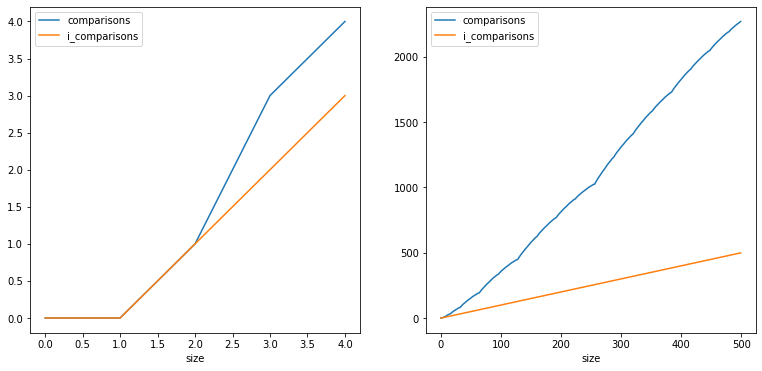

In [85]:
fig, axes = plt.subplots(ncols = 2)

asc = m_asc.head(5)
asc.plot(ax=axes[0],figsize=(13,6))
m_asc.plot(ax=axes[1],figsize=(13,6))

In [72]:
dsc = df[df['input_type']=='descending']
dsc = dsc[['sort_type','size','comparisons','input_type']]

m_dsc = dsc[dsc['sort_type']=='merge']
i_dsc = dsc[dsc['sort_type']=='insertion']
m_dsc = m_dsc[['size','comparisons']]
m_dsc.set_index('size',inplace=True)
i_dsc = i_dsc[['size','comparisons']]
i_dsc.set_index('size',inplace=True)

m_dsc['i_comparisons'] = i_dsc.comparisons
m_dsc.tail(500)

#comparisons is for merge comparisons. i for insertion

,comparisons,i_comparisons
size,,
0,0.0,0.0
1,0.0,0.0
2,1.0,2.0
3,2.0,5.0
4,4.0,9.0
...,...,...
495,2184.0,122759.0
496,2192.0,123255.0
497,2197.0,123752.0


In [74]:
#calculate the differences of the y-coords. Look for points where they meet (diff==0) or
#where there is sign change

diff = m_dsc.comparisons - m_dsc.i_comparisons
d_intersect = []
for i in range(len(m_dsc)):
    if i == 499:
        break
    if diff[i] == 0 or diff[i]*diff[i+1]<0:
        d_intersect.append(i)
print(d_intersect)

[0, 1]


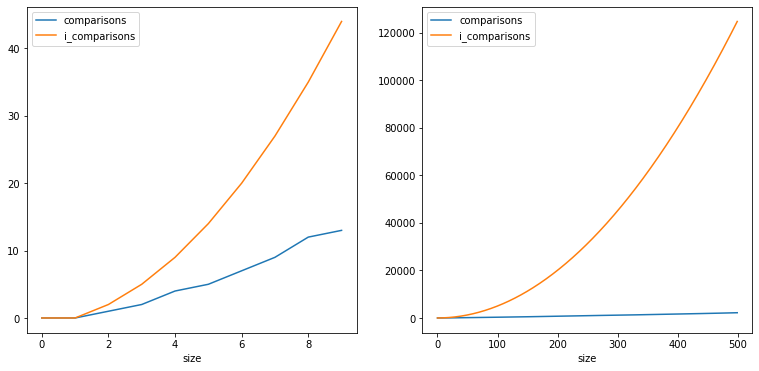

In [84]:
fig, axes = plt.subplots(ncols = 2)

dsc = m_dsc.head(5)
dsc.plot(ax=axes[0],figsize=(13,6))
m_dsc.plot(ax=axes[1],figsize=(13,6))

In [86]:
ran = df[df['input_type']=='random']
ran = ran[['sort_type','size','comparisons','input_type']]

m_ran = ran[ran['sort_type']=='merge']
i_ran = ran[ran['sort_type']=='insertion']
m_ran = m_ran[['size','comparisons']]
m_ran.set_index('size',inplace=True)
i_ran = i_ran[['size','comparisons']]
i_ran.set_index('size',inplace=True)

m_ran['i_comparisons'] = i_dsc.comparisons
m_ran.tail(500)

#comparisons is for merge comparisons. i for insertion

,comparisons,i_comparisons
size,,
0,0.00,0.0
1,0.00,0.0
2,1.00,2.0
3,2.72,5.0
4,4.64,9.0
...,...,...
495,3808.24,122759.0
496,3820.06,123255.0
497,3831.26,123752.0


In [88]:
#calculate the differences of the y-coords. Look for points where they meet (diff==0) or
#where there is sign change

diff = m_ran.comparisons - m_ran.i_comparisons
r_intersect = []
for i in range(len(m_ran)):
    if i == 499:
        break
    if diff[i] == 0 or diff[i]*diff[i+1]<0:
        r_intersect.append(i)
print(r_intersect)


[0, 1]


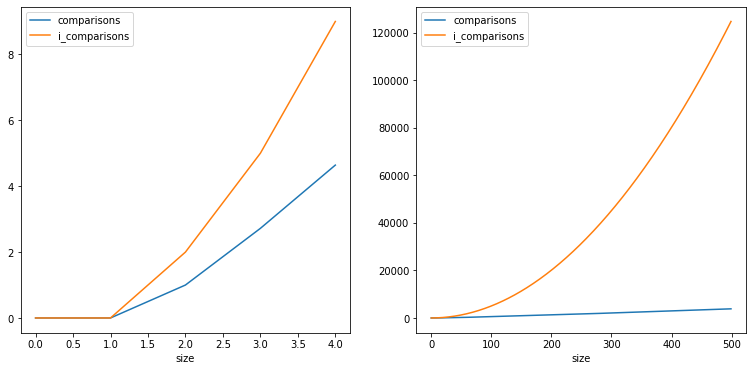

In [87]:
fig, axes = plt.subplots(ncols = 2)

ran = m_ran.head(5)
ran.plot(ax=axes[0],figsize=(13,6))
m_ran.plot(ax=axes[1],figsize=(13,6))